In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

df.columns = [
    'sepal_length',
    'sepal_width',
    'petal_length',
    'petal_width',
    'label'
]

In [8]:
display(df)

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

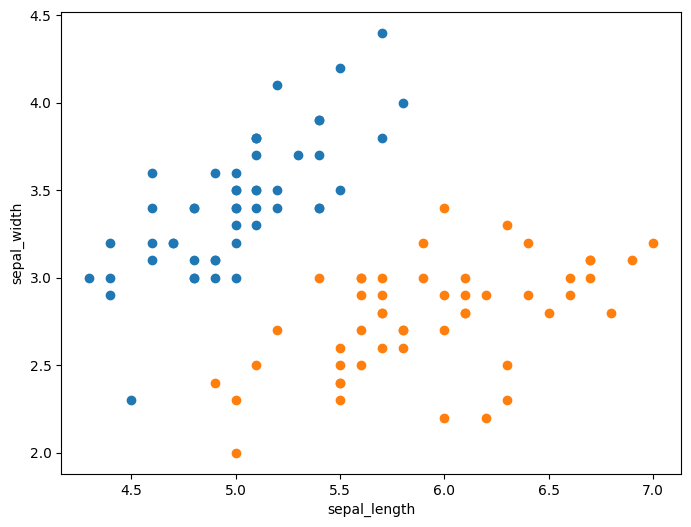

In [13]:
# 将数据集绘制成二动点图
plt.figure(figsize = (8,6))
plt.scatter(df[:50]['sepal_length'], df[:50]['sepal_width'], label = 0)
plt.scatter(df[50:100]['sepal_length'], df[50:100]['sepal_width'], label = 1)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [14]:
# 准备数据
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:, :-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [29]:
# 定义感知机模型
class Model:
    def __init__(self): # 给self设置一些属性
        self.w = np.zeros(len(data[0]) - 1, dtype = np.float32) # 输入的特征向量的维度，减一是因为最后一列为特征列
        self.b = 0
        self.learning_rate = 0.01
    
    # 定义感知机的基本公式
    def sign(self, X, w, b):
        return np.dot(X, w) + b

    # 定义随机梯度下降法
    def fit(self, X, y):
        is_wrong = False
        while not is_wrong:
            wrong_cnt = 0
            for i in range(len(X)):
                X_train = X[i]
                y_train = y[i]
                if y_train * self.sign(X_train, self.w, self.b) <= 0:
                    self.w = self.w + self.learning_rate * np.dot(X_train, y_train)
                    self.b = self.b + self.learning_rate * y_train
                    wrong_cnt += 1
                
                if wrong_cnt == 0: # 如果在某次迭代中，没有错误样本了，即所有的样本都被正确分类了！即返回True
                    is_wrong = True
                    
        

        print("训练完成,迭代次数:", wrong_cnt)
        print("w:", self.w)
        print("b:", self.b)


In [28]:
# 调用实例
perceptron = Model()
perceptron.fit(X, y)

训练完成,迭代次数: 99
w: [ 0.185 -0.224]
b: -0.060000000000000005


C:\Users\yyxyyds\AppData\Local\Temp\ipykernel_1624\3404503885.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
C:\Users\yyxyyds\AppData\Local\Temp\ipykernel_1624\3404503885.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')


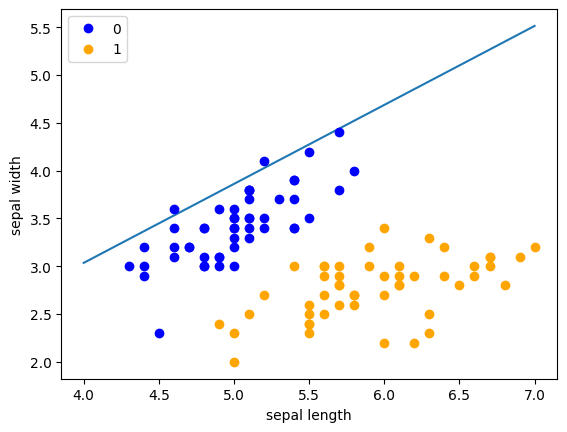

In [30]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

#### 看一下sk-learn中直接调用的结果


In [31]:
import sklearn
from sklearn.linear_model import Perceptron

In [32]:
sklearn.__version__

'1.7.1'

In [35]:
clf = Perceptron(
    fit_intercept = True,
    max_iter = 1000,
    shuffle = True
)

clf.fit(X, y)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,0


In [37]:
# 输出w
print(clf.coef_)

[[ 23.2 -38.7]]


In [38]:
# 输出截距
print(clf.intercept_)

[-5.]


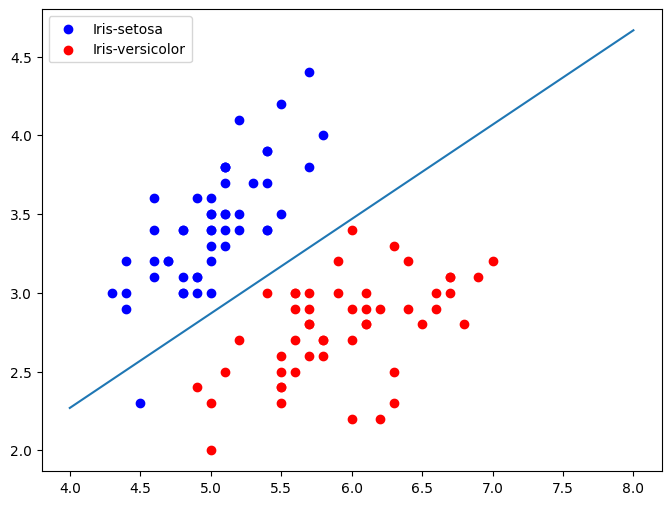

In [45]:
# 将分离超平面可视化
plt.figure(figsize = (8, 6))
plt.scatter(data[:50, 0], data[:50, 1], c = 'b', label = 'Iris-setosa')
plt.scatter(data[50:100, 0], data[50:100, 1], c = 'r', label = 'Iris-versicolor')

# 画出分离超平面的线 
x_points = np.linspace(4, 8 )
y_ =  -(clf.coef_[0][0] * x_points + clf.intercept_) / clf.coef_[0][1]
plt.plot(x_points, y_)

plt.legend()
plt.show()

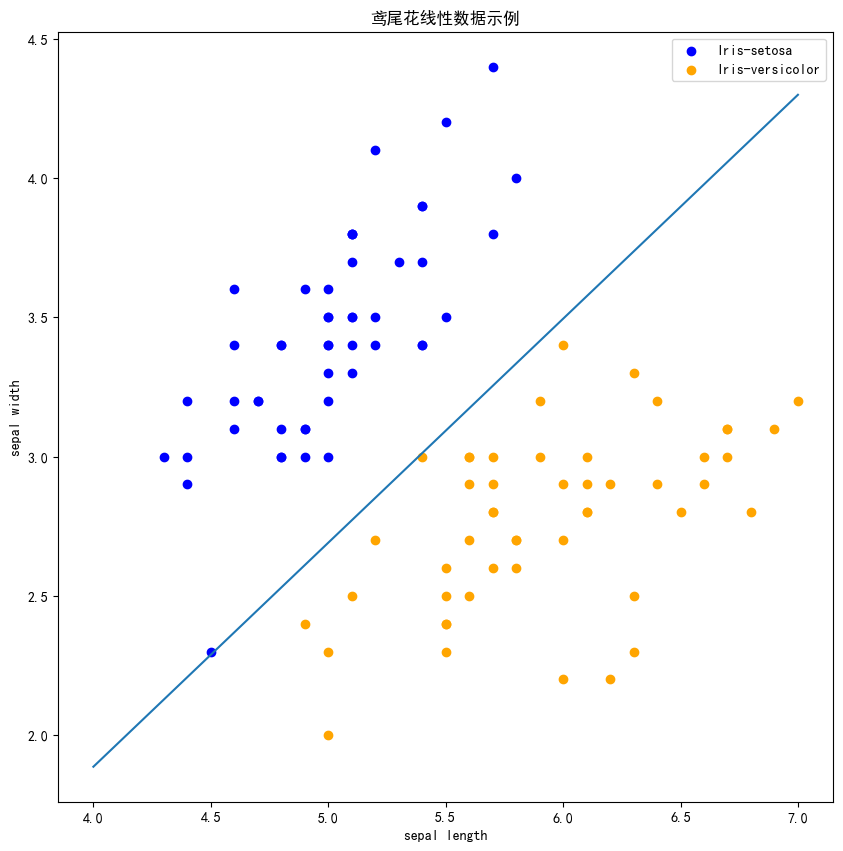

In [46]:
# 我们发现上图中左下角有一个蓝色的点没有被正确分类，怎么办呢？
# 原来是clf中的参数 tol, 该参数规定，如果本次迭代的损失与上次迭代的损失只差小于一个特定的值，停止迭代，所以我们需要设置tol =None 使之可以继续迭代

clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True)
clf.fit(X, y)

# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()